<a href="https://colab.research.google.com/github/radeonaru/pcvk_ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


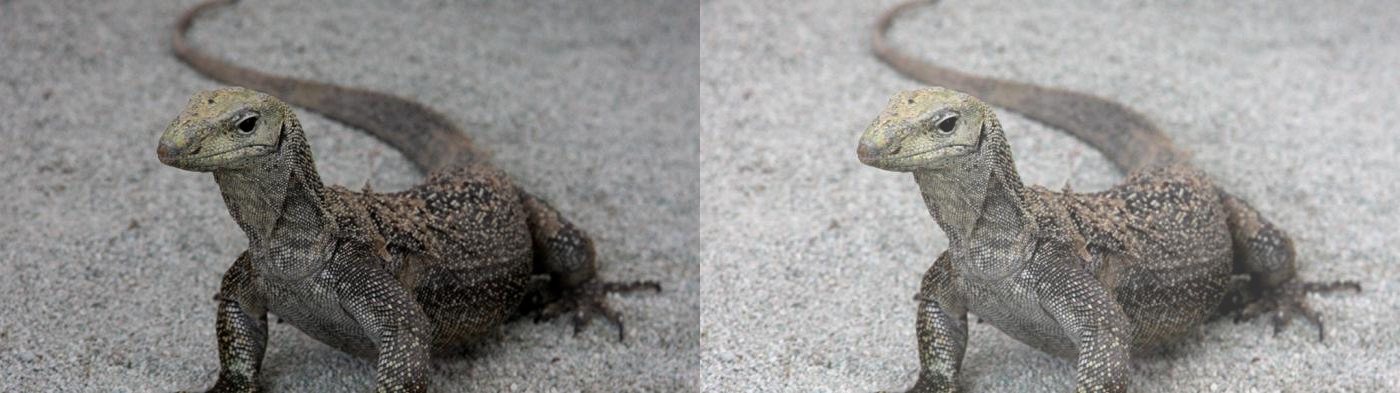

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/biawak-15.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **Tugas Praktikum**

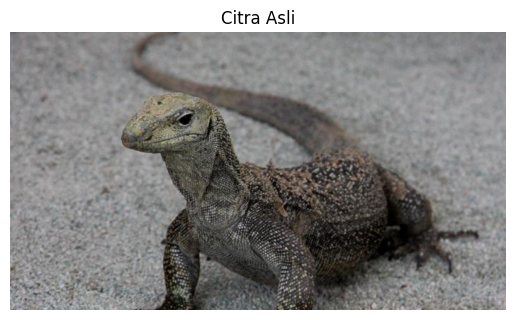

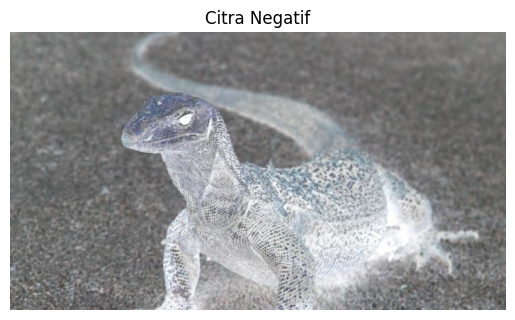

In [4]:
#Nomor 1
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan citra
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Baca citra asli (ganti 'image_path' dengan path citra yang akan di-inverse)
image_path = '/content/drive/MyDrive/biawak-15.jpg'  # Ganti dengan path file citra yang diinginkan
image = cv2.imread(image_path)

# Periksa apakah citra berhasil dimuat
if image is None:
    print("Citra tidak dapat dimuat. Pastikan path benar.")
else:
    # Tampilkan citra asli
    display_image(image, title="Citra Asli")

    # Proses inverse citra
    negative_image = 255 - image

    # Tampilkan citra negative
    display_image(negative_image, title="Citra Negatif")


In [9]:
#Nomor 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Fungsi untuk menampilkan citra
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Fungsi untuk melakukan truncate agar nilai pixel berada pada rentang 0-255
def truncate(value):
    return max(0, min(255, int(value)))

# Fungsi untuk transformasi kontras dan brightness
def apply_contrast_brightness(image, contrast, brightness):
    # Hitung Contrast Correction Factor (F)
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

    # Buat array kosong untuk menyimpan citra baru
    new_image = np.zeros(image.shape, dtype=np.uint8)

    # Iterasi pada setiap pixel
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel = image[y, x]
            # Pisahkan nilai RGB
            R, G, B = pixel[0], pixel[1], pixel[2]

            # Hitung nilai baru untuk masing-masing channel (R, G, B)
            R_new = truncate(factor * (R - 128) + 128 + brightness)
            G_new = truncate(factor * (G - 128) + 128 + brightness)
            B_new = truncate(factor * (B - 128) + 128 + brightness)

            # Set nilai pixel baru ke citra hasil
            new_image[y, x] = [R_new, G_new, B_new]

    return new_image

# Fungsi untuk menerima input kontras dan brightness
def adjust_image(contrast, brightness):
    # Baca citra asli (ganti dengan path citra yang diinginkan)
    image_path = '/content/drive/MyDrive/biawak-15.jpg'  # Ganti dengan path file citra
    image = cv2.imread(image_path)

    # Periksa apakah citra berhasil dimuat
    if image is None:
        print("Citra tidak dapat dimuat. Pastikan path benar.")
    else:
        # Terapkan transformasi kontras dan brightness
        adjusted_image = apply_contrast_brightness(image, contrast, brightness)

        # Tampilkan citra asli dan citra hasil
        display_image(image, title="Citra Asli")
        display_image(adjusted_image, title="Citra Setelah Kontras dan Brightness")

# Event input untuk masukkan kontras dan brightness
interact(adjust_image,
         contrast=(1.0, 3.0, 0.1),  # Rentang kontras dari 1.0 hingga 3.0
         brightness=(-255, 255, 1))  # Rentang brightness dari -255 hingga 255


interactive(children=(FloatSlider(value=2.0, description='contrast', max=3.0, min=1.0), IntSlider(value=0, des…

<function __main__.adjust_image(contrast, brightness)>

In [10]:
#Nomor 3
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Fungsi untuk menampilkan citra
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Fungsi untuk transformasi logaritmik
def log_transform(image, brightness):
    # Konstanta penskalaan (c), ditentukan berdasarkan rentang warna citra
    c = 255 / np.log(1 + np.max(image))

    # Terapkan transformasi logaritmik untuk setiap channel
    log_image = c * (np.log(1 + image.astype(np.float64))) + brightness

    # Pastikan hasil berada dalam rentang 0-255
    log_image = np.clip(log_image, 0, 255).astype(np.uint8)

    return log_image

# Fungsi untuk menerima input tingkat kecerahan
def adjust_brightness_log(brightness):
    # Baca citra asli (ganti 'image_path' dengan path citra yang diinginkan)
    image_path = '/content/drive/MyDrive/biawak-15.jpg'  # Ganti dengan path file citra
    image = cv2.imread(image_path)

    # Periksa apakah citra berhasil dimuat
    if image is None:
        print("Citra tidak dapat dimuat. Pastikan path benar.")
    else:
        # Terapkan transformasi logaritmik
        log_image = log_transform(image, brightness)

        # Tampilkan citra asli dan citra hasil transformasi logaritmik
        display_image(image, title="Citra Asli")
        display_image(log_image, title="Citra Setelah Transformasi Logaritmik")

# Event input untuk masukkan nilai brightness
interact(adjust_brightness_log,
         brightness=(-100, 100, 1))  # Rentang nilai brightness dari -100 hingga 100


interactive(children=(IntSlider(value=0, description='brightness', min=-100), Output()), _dom_classes=('widget…

<function __main__.adjust_brightness_log(brightness)>

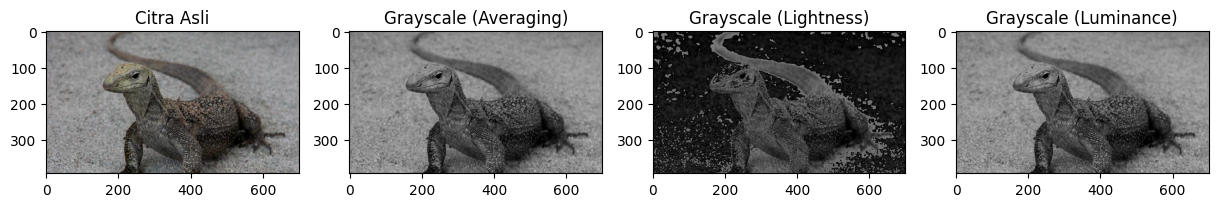

In [18]:
#Nomor 4
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan citra dalam satu tampilan dengan subplot
def display_images(images, titles):
    plt.figure(figsize=(15, 10))

    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
        plt.title(title)
        plt.axis('on')

    plt.show()

# Fungsi untuk transformasi grayscale dengan metode averaging
def averaging_grayscale(image):
    return np.mean(image, axis=2).astype(np.uint8)

# Fungsi untuk transformasi grayscale dengan metode lightness
def lightness_grayscale(image):
    min_val = np.min(image, axis=2)
    max_val = np.max(image, axis=2)
    return ((min_val + max_val) / 2).astype(np.uint8)

# Fungsi untuk transformasi grayscale dengan metode luminance
def luminance_grayscale(image):
    return (0.21 * image[:,:,2] + 0.72 * image[:,:,1] + 0.07 * image[:,:,0]).astype(np.uint8)

# Fungsi untuk menerapkan semua metode transformasi dan menampilkan hasilnya
def apply_grayscale_transforms():
    # Baca citra asli (ganti 'image_path' dengan path citra yang diinginkan)
    image_path = '/content/drive/MyDrive/biawak-15.jpg'  # Ganti dengan path file citra
    image = cv2.imread(image_path)

    # Periksa apakah citra berhasil dimuat
    if image is None:
        print("Citra tidak dapat dimuat. Pastikan path benar.")
    else:
        # Terapkan metode transformasi
        grayavg_image = averaging_grayscale(image)
        graylight_image = lightness_grayscale(image)
        graylumi_image = luminance_grayscale(image)

        # Tampilkan citra asli dan citra hasil transformasi dalam satu tampilan
        images = [image, grayavg_image, graylight_image, graylumi_image]
        titles = ["Citra Asli", "Grayscale (Averaging)", "Grayscale (Lightness)", "Grayscale (Luminance)"]
        display_images(images, titles)

# Panggil fungsi untuk menerapkan transformasi dan menampilkan hasil
apply_grayscale_transforms()


In [20]:
#Nomor 5
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# Fungsi untuk menampilkan citra
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Fungsi untuk menampilkan warna tertentu pada citra dan mengubah yang lain menjadi grayscale
def colorize_and_grayscale(image, color):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

    # Define the lower and upper bounds for the color in HSV space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    color_bounds = {
        'blue': ([100, 50, 50], [140, 255, 255]),
        'green': ([35, 50, 50], [85, 255, 255]),
        'red': ([0, 50, 50], [10, 255, 255]),
        'yellow': ([20, 50, 50], [30, 255, 255]),
        'cyan': ([85, 50, 50], [100, 255, 255]),
        'magenta': ([140, 50, 50], [170, 255, 255])
    }

    if color not in color_bounds:
        raise ValueError("Warna tidak valid. Pilih dari: 'blue', 'green', 'red', 'yellow', 'cyan', 'magenta'")

    lower_bound, upper_bound = color_bounds[color]
    lower_bound = np.array(lower_bound)
    upper_bound = np.array(upper_bound)

    # Create a mask for the color
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # Extract the color areas
    color_image = cv2.bitwise_and(image, image, mask=mask)

    # Combine the color image with the grayscale image
    combined_image = np.where(mask[:, :, None] == 0, gray_image, color_image)

    return combined_image

# Fungsi untuk menerapkan proses dengan input warna
def apply_colorize_and_grayscale(color):
    # Baca citra asli (ganti 'image_path' dengan path citra yang diinginkan)
    image_path = '/content/drive/MyDrive/biawak-15.jpg'  # Ganti dengan path file citra
    image = cv2.imread(image_path)

    # Periksa apakah citra berhasil dimuat
    if image is None:
        print("Citra tidak dapat dimuat. Pastikan path benar.")
    else:
        # Tampilkan citra asli
        display_image(image, title="Citra Asli")

        # Tampilkan citra dengan warna yang dipilih tetap dan bagian lain menjadi grayscale
        result_image = colorize_and_grayscale(image, color)
        display_image(result_image, title=f"Warna {color.capitalize()} Tetap, Lainnya Grayscale")

# Dropdown menu untuk memilih warna
color_options = ['blue', 'green', 'red', 'yellow', 'cyan', 'magenta']

# Event input untuk memilih warna
interact(apply_colorize_and_grayscale, color=Dropdown(options=color_options, value='blue', description='Pilih warna:'))


interactive(children=(Dropdown(description='Pilih warna:', options=('blue', 'green', 'red', 'yellow', 'cyan', …

<function __main__.apply_colorize_and_grayscale(color)>